# <center>Big Data For Engineers &ndash; Exercises &amp; Solutions</center>
## <center>Spring 2019 &ndash; Week 6 &ndash; ETH Zurich</center>
## <center>XML validation</center>


## 1. XML Data Models &ndash; Information Sets

XML "Information Set" provides an abstract representation of an XML document—it can be thought of as a set of rules on how one would draw an XML document on a whiteboard.


Draw the Information Set trees for the following XML documents. You can confine your trees to only have the following types of information items: document information item, elements, character information items, comment information items, and attributes.

#### Document 1

```xml
<Burger>
    <Bun>
        <Pickles/>
        <Cheese origin="Switzerland" />
        <Patty/>
    </Bun>
</Burger>
```

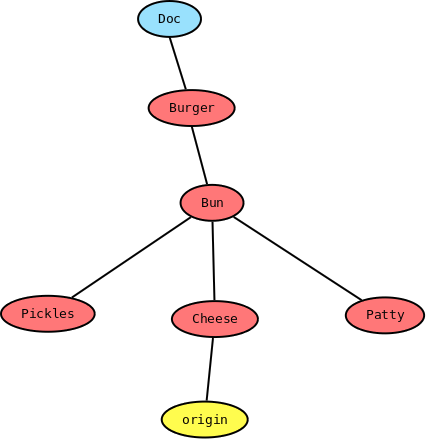
Note: the attribute should contain both the attribute name (origin) and its value (Switzerland). These pictures should be updated to reflect this.

#### Document 2
```xml
<Band name="Metallica">
    <Member>James Hetfield</Member>
    <Member>Lars Ulrich</Member>
    <Member>Kirk Hammett</Member>
    <Member>Robert Trujillo</Member>
</Band>
```

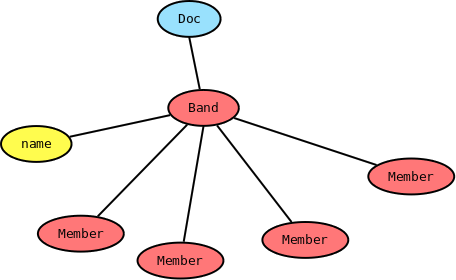

#### Document 3
```xml
<catalog>
   <!-- A list of books -->
   <book id='bk101'>
      <author>Gambardella, Matthew</author>
      <title>XML Developer's Guide</title>
      <genre>Computer</genre>
      <price>44.95</price>
      <publish_date version='hard' version2='soft'>2000-10-01</publish_date>
   </book>
</catalog>
```

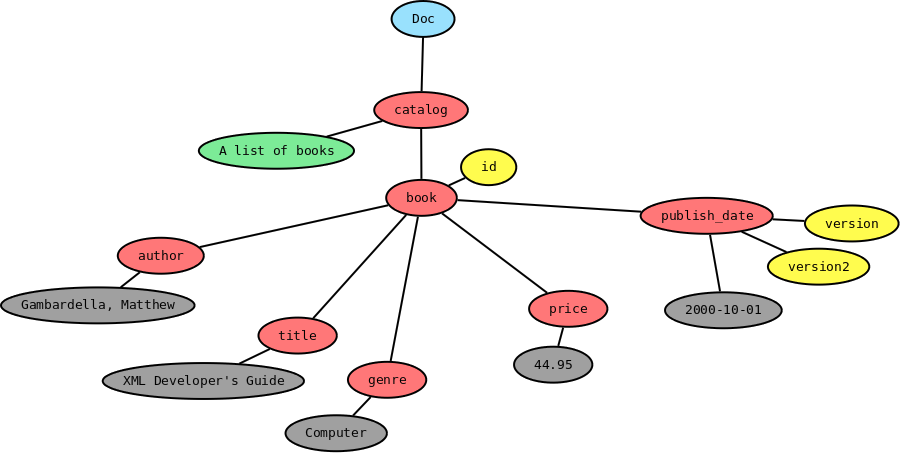

#### Document 4
```xml
<eth:eth xmlns:eth="http://www.ethz.ch" 
         xmlns:ethdb="http://www.dbis.ethz.ch" 
         date="11.11.2006" 
         ethdb:date="12.11.2006">
   <eth:date>16.11.2017</eth:date>
   <eth:president since="2015">Prof. Dr. Lino Guzzella</eth:president>
   <ethdb:Rektor>Prof. Dr. Sarah M. Springman</ethdb:Rektor>
</eth:eth>
```

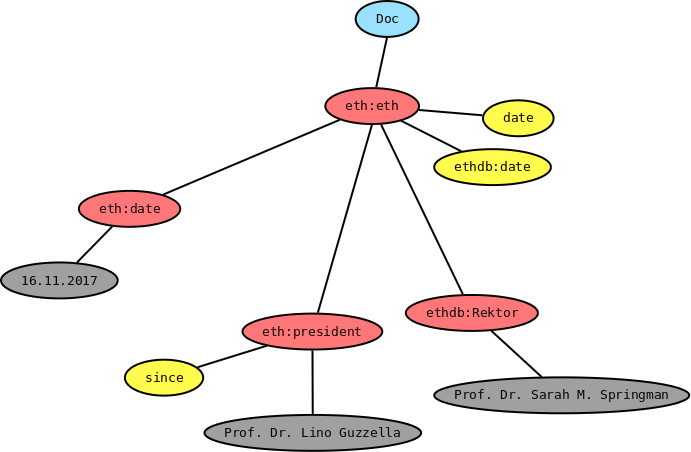

## 2. Information Sets and Namespaces

For each of the following XML documents:
1. Draw its Information Set tree.
1. Color the element and attribute nodes by namespace using the following table:

| Namespace | Color |
|----|----|
| No namespace | Gray |
| http://example.com/food/fast | Blue |
| http://example.com/food/vegetables | Green |
| http://example.com/food/meat | Red |



#### Document 1
```xml
<Pizza>
    <Topping>
        <Salami/>
        <Cheese/>
        <Oregano/>
    </Topping>
</Pizza>
```
#### Solution
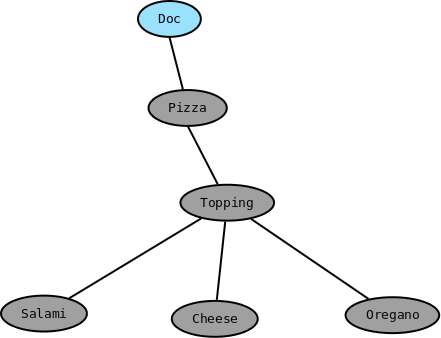

#### Document 2
```xml
<fast:Wrap xmlns:fast="http://example.com/food/fast">
    <fast:Filling>
        <fast:Chicken/>
        <fast:Salad/>
        <fast:Tomato/>
    </fast:Filling>
</fast:Wrap>
```
#### Solution
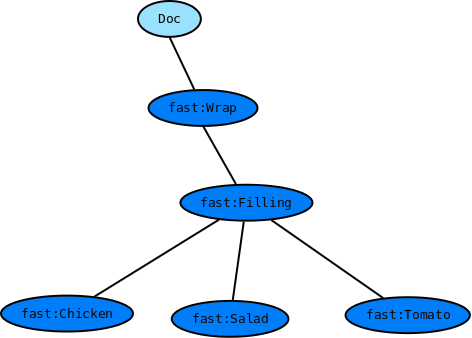

#### Document 3
```xml
<ff:Burger xmlns:meat="http://example.com/food/meat"
           xmlns:veg="http://example.com/food/vegetables"
           xmlns:ff="http://example.com/food/fast">
    <ff:Bun remarks="gluten-free">
        <veg:Tomatoes/>
        <ff:Patty>
            <meat:Beef/>
        </ff:Patty>
        <veg:Salad/>
    </ff:Bun>  
</ff:Burger>
```
#### Solution
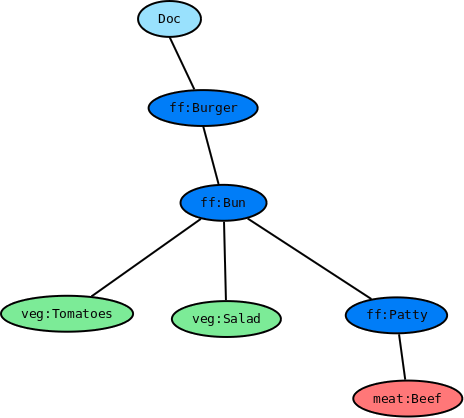

#### Note
Note that in this exercise we bound the `http://example.com/food/fast` namespace to different prefixes in different documents: `fast` in Document 2 and `ff` in Document 3. However, it is better practice to bind the same namespace to the same prefix across documents. In this exercise that was made to demonstrate that the prefix does not matter when determining the namespace of a node&mdash;only the namespace name does. 

## 3. XML Data Models &ndash; XDM: XPath and XQuery Data Model

In this task we will explore some parts of XDM, another XML data model.

3.1. Name a couple of differences between XDM and Information Sets

3.2. Which of the following XDM sequences are equivalent?


1. ```(1, 2, 3, 4, 5, <a/>, <foo><bar/></foo>)```
 
2. ```(1, (2, 3), 4, (5, <a/>, <foo><bar/></foo>))```
 
3. ```(1, <foo><bar/></foo>, 2, 3, 4, 5, <a/>)```
 
4. ```(<a/>)```
 
5. ```<a/>```
 
6. ```()```
 
7. ```(1, 1, 1)```

8. ```((),(),())```
 
9. ```(1)```

### Solution

3.1. 

* XDM model supports simple and complex types, which Information Set model does not (very basic and limited attribute types only)
* XDM is sequence-based, while the infoset model only models the tree for one document. Then, the XDM can directly be processed by querying languages like XPath and XQuery. 
* XDM supports both validated and non-validated (that is, only well-formed) data. Infoset doesn't support validation (it's the PSVI that extends it to do so). XDM also supports, in subsequent versions, other items, such as functions, maps, and arrays.

3.2.

* 1 and 2 are equivalent
* 4 and 5 are equivalent
* 6 and 8 are equivalent

## 4. XML Schema
 
*XML Schema* is a way to provide schemas for XML documents, i.e., to describe certain restrictions on the structure and content of XML documents such as, for example, "`<birthday>` elements should only contain valid dates".

In this task we will explore XML Schemas in detail.

To test XML validation, you can either use an online validator like [this one](https://www.freeformatter.com/xml-validator-xsd.html) or use *oXygen* again. When you open an XML Schema in oXygen, you can switch to its graphical representation, by choosing the "Design" mode at the bottom of the document pane; "Text" mode shows the XML Schema as an XML document.

### 4.0 Episode 0

Match the following XML documents to XML Schemas that will validate them:

#### Document 1
```xml
<happiness xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
     xsi:noNamespaceSchemaLocation="Schema.xsd"/>
```

#### Document 2
```xml
<happiness xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
     xsi:noNamespaceSchemaLocation="Schema.xsd">
    <health/>
    <friends/>
    <family/>
</happiness>
```

#### Document 3
```xml
<happiness xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
     xsi:noNamespaceSchemaLocation="Schema.xsd">
    3.141562
</happiness>
```

#### Document 4
```xml
<happiness xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
     xsi:noNamespaceSchemaLocation="Schema.xsd">
    <health value="100"/>
    <friends/>
    <family/>
</happiness>
```

#### Document 5
```xml
<happiness xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
     xsi:noNamespaceSchemaLocation="Schema.xsd">
    <health/>
    <friends/>
    <family/>
    But perhaps everybody defines it differently...
</happiness>
```

______


#### Schema 1
```xml
<xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema">
    <xs:element name="happiness">
        <xs:complexType>
            <xs:sequence>
                <xs:element name="health"/>
                <xs:element name="friends"/>
                <xs:element name="family"/>
            </xs:sequence>
        </xs:complexType>
    </xs:element>
</xs:schema>
```

#### Schema 2
```xml
<xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema">
    <xs:element name="happiness">
        <xs:complexType mixed="true">
            <xs:sequence>
                <xs:element name="health"/>
                <xs:element name="friends"/>
                <xs:element name="family"/>
            </xs:sequence>
        </xs:complexType>
    </xs:element>
</xs:schema>
```

#### Schema 3
```xml
<xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema">
    <xs:element name="happiness" type="xs:decimal"/>
</xs:schema>
```

#### Schema 4
```xml
<xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema">
    <xs:element name="happiness">
        <xs:complexType>
            <xs:sequence/>
        </xs:complexType>
    </xs:element>
</xs:schema>
```

#### Schema 5
```xml
<xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema">
    <xs:element name="happiness">
        <xs:complexType>
            <xs:sequence>
                <xs:element name="health">
                    <xs:complexType>
                        <xs:attribute name="value" type="xs:integer" use="required"/>
                    </xs:complexType>
                </xs:element>
                <xs:element name="friends"/>
                <xs:element name="family"/>
            </xs:sequence>
        </xs:complexType>
    </xs:element>
</xs:schema>
```

#### Solution
*  Document 1 – Schema 4
*  Document 2 – Schema 1 and Schema 2
*  Document 3 – Schema 3
*  Document 4 – Schema 1, Schema 2 and Schema 5
*  Document 5 – Schema 2

### 4.1 Episode 1

The [Great Language Game](http://greatlanguagegame.com/) was a game in which you are given a voice clip to listen, and you are asked to identify the language in which the person was speaking. It was a multiple-choice question&ndash;you make your choice out of several alternatives. The game is closed now, unfortunately ;( But, we can still use their datasets for our exercises!

The following XML document presents a user's attempt at answering a single question in the game: it contains the identifier of the voice clip, the choices presented to the player, and the player's response.
Provide an XML Schema which will validate this document:

```xml
<?xml version="1.0" encoding="UTF-8"?>
<g:attempt xmlns:g="http://www.systems.ethz.ch/GreatLanguageGame" 
    g:country="AU" g:date="2013-08-19">
    <g:voiceClip>48f9c924e0d98c959d8a6f1862b3ce9a</g:voiceClip>
    <g:choices>
        <g:choice>Maori</g:choice>
        <g:choice>Mandarin</g:choice>
        <g:choice>Norwegian</g:choice>
        <g:choice>Tongan</g:choice>
    </g:choices>
    <g:target>Norwegian</g:target>
    <g:guess>Norwegian</g:guess>
</g:attempt>

```

### 4.1 Solution
Here is one possible XML Schema that will validate the original document:
```xml
<?xml version="1.0" encoding="UTF-8"?>
<xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema"
    targetNamespace="http://www.systems.ethz.ch/GreatLanguageGame" elementFormDefault="qualified"
    attributeFormDefault="qualified">
    <xs:element name="attempt">
        <xs:complexType>
            <xs:sequence maxOccurs="1" minOccurs="1">
                <xs:element name="voiceClip" type="xs:string"/>
                <xs:element name="choices">
                    <xs:complexType>
                        <xs:sequence>
                            <xs:element name="choice" type="xs:string" minOccurs="4" maxOccurs="4"/>
                        </xs:sequence>
                    </xs:complexType>
                </xs:element>
                <xs:element name="target" type="xs:string"/>
                <xs:element name="guess" type="xs:string"/>
            </xs:sequence>
            <xs:attribute name="country" type="xs:string"/>
            <xs:attribute name="date" type="xs:date"/>
        </xs:complexType>
    </xs:element>
</xs:schema>
```

Notice that the schema uses `elementFormDefault` and `attributeFormDefault` attributes. We must use `elementFormDefault="qualified"`, because *all* elements in the original document are prefixed with the namespace prefix `g:`; if we set `elementFormDefault="unqualified"`, then we would also have to remove the `g:` prefix from all elements except the root `<g:attempt>`. You can read more about this feature of XML Schemas [here](https://www.w3.org/TR/xmlschema-0/#NS). A similar argument applies to the `attributeFormDefault` but with respect to attribute names.

Also, the root element of the document should be changed as follows to point to the schema:
```xml
<g:attempt xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
    xsi:schemaLocation="http://www.systems.ethz.ch/GreatLanguageGame SingleGreatLanguageGame.xsd"
    xmlns:g="http://www.systems.ethz.ch/GreatLanguageGame" 
    g:country="AU" g:date="2013-08-19">
```

### 4.2 Episode 2
Continuing the topic of the Great Language Game, provide an XML Schema which will validate the following document:

```xml
<?xml version="1.0" encoding="UTF-8"?>
<g:attempts xmlns:g="http://www.systems.ethz.ch/GreatLanguageGame">
    <g:attempt g:country="AU" g:date="2013-08-19">
        <g:voiceClip>48f9c924e0d98c959d8a6f1862b3ce9a</g:voiceClip>
        <g:choices>
            <g:choice>Maori</g:choice>
            <g:choice>Mandarin</g:choice>
            <g:choice>Norwegian</g:choice>
            <g:choice>Tongan</g:choice>
        </g:choices>
        <g:target>Norwegian</g:target>
        <g:guess>Norwegian</g:guess>
    </g:attempt>
    <g:attempt g:country="US" g:date="2014-03-01">
        <g:voiceClip>5000be64c8cc8f61dda50fca8d77d307</g:voiceClip>
        <g:choices>
            <g:choice>Finnish</g:choice>
            <g:choice>Mandarin</g:choice>
            <g:choice>Scottish Gaelic</g:choice>
            <g:choice>Slovak</g:choice>
            <g:choice>Swedish</g:choice>
            <g:choice>Thai</g:choice>
        </g:choices>
        <g:target>Slovak</g:target>
        <g:guess>Slovak</g:guess>
    </g:attempt>
    <g:attempt g:country="US" g:date="2014-03-01">
        <g:voiceClip>923c0d6c9e593966e1b6354cc0d794de</g:voiceClip>
        <g:choices>
            <g:choice>Hungarian</g:choice>
            <g:choice>Sinhalese</g:choice>
            <g:choice>Swahili</g:choice>
        </g:choices>
        <g:target>Hungarian</g:target>
        <g:guess>Sinhalese</g:guess>
    </g:attempt>
</g:attempts>
```

### 4.2 Solution
Here is one possible XML Schema that will validate the original document:
```xml
<?xml version="1.0" encoding="UTF-8"?>
<xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema"
    targetNamespace="http://www.systems.ethz.ch/GreatLanguageGame" elementFormDefault="qualified"
    attributeFormDefault="qualified">
    <xs:element name="attempts">
        <xs:complexType>
            <xs:sequence>
                <xs:element name="attempt" minOccurs="1" maxOccurs="unbounded">
                    <xs:complexType>
                        <xs:sequence maxOccurs="1" minOccurs="1">
                            <xs:element name="voiceClip" type="xs:string"/>
                            <xs:element name="choices">
                                <xs:complexType>
                                    <xs:sequence>
                                        <xs:element name="choice" type="xs:string" minOccurs="3"
                                            maxOccurs="6"/>
                                    </xs:sequence>
                                </xs:complexType>
                            </xs:element>
                            <xs:element name="target" type="xs:string"/>
                            <xs:element name="guess" type="xs:string"/>
                        </xs:sequence>
                        <xs:attribute name="country" type="xs:string"/>
                        <xs:attribute name="date" type="xs:date"/>
                    </xs:complexType>
                </xs:element>
            </xs:sequence>
        </xs:complexType>
    </xs:element>
</xs:schema>

```

As in the previous task, the root element of the original document has to be augmented with an `xsi:schemaLocation` attribute.

------
This concludes our exercise sheet on XML validation. Thank you for taking your time to go through it!